In [1]:
import pandas as pd
import math
import os
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from PIL import Image
import glob
import moviepy.editor as mp
from datetime import datetime
import time

In [ ]:
# Define particles properties
class particle:
    def __init__(self, R):
        self.radius = R

    def _posn(self, x, y):
        self.posn = np.array([x, y])

    def _vel(self, x, y):
        self.vel = np.array([x, y])

    def _acc(self, x, y):
        self.acc = np.array([x, y])


def dem2D(y, t, radius, n_particles):

    dydt = np.zeros((2, 4 * n_particles))

    for i in range(n_particles):
        r1 = radius

        for j in range(i, n_particles + 1):
            r2 = radius

            # Particle interaction
            if (norm(y[i].posn - y[j].posn) < r1 + r2):

                # Normal force contact law
                F_mag = k * abs((r1 + r2) - norm(y[i].posn - y[j].posn))
                F_dir = (r1 - r2) / norm(r1 - r2)

                # Add due to net force
                y[i].acc += F_mag * F_dir
                y[j].acc += -F_mag * F_dir

        # Wall interaction
        if (y[i].posn[1] - r1 < Ly_min):
            
            y[i].acc[1] += -k * abs(y[i].posn[1] - r1 - Ly_min)

        elif (y[i].posn[1] + r1 > Ly_max):
            y[i].acc[1] += -k * abs(y[i].posn[1] + r1 - Ly_max)

        if (y[i].posn[0] - r1 < Lx_min):
            y[i].acc[0] += -k * abs(y[i].posn[0] - r1 - Lx_min)

        elif (y[i].posn[0] + r1 > Ly_max):
            y[i].acc[0] += -k * abs(y[i].posn[0] + r1 - Lx_max)

n_particles = 10
particles = []
for i in range(n_particles):
    particles.append(particle(particle_radius))
    particles[i]._posn(r0_x[i], r0_y[i])
    particles[i]._vel(v0_x[i], v0_y[i])

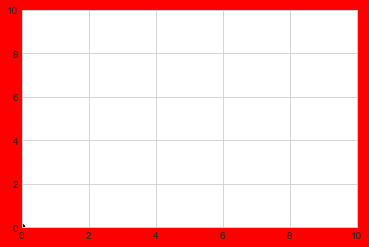

In [11]:
from scipy.integrate import odeint
import time
import matplotlib.pyplot as plt
import random
from matplotlib import animation

# Single particle
def part(y, t, F, F2):    
    
    p1x = y[0]
    p1y = y[1]
    v1x = y[2]
    v1y = y[3]
    p2x = y[4]
    p2y = y[5]
    v2x = y[6]
    v2y = y[7]    
    
#     Fx = .1*np.random.uniform(-1,1)
#     Fx = .1*random.choice([-1,2])
    Fx= 0
#     print(Fx)
    dydt = np.array([v1x, v1y, Fx, -F, v2x, v2y, Fx, -F])

    return dydt

y0 = np.array([0, 0, 1, 10*np.sqrt(2), 0, 5, 1, 10])

t = np.linspace(0, 10, 1000)
sol = odeint(part, y0, t, args=(10,1))

fig, ax = plt.subplots(facecolor='red')
ax.axis([0,10,0,10])
l = ax.scatter([],[],cmap='viridis')

def animate(i):
    l.set_offsets(np.array([sol[i,0:2], sol[i,4:6]]))
    v_magn_1 = sol[i,2]**2 + sol[i,3]**2
    v_magn_2 = sol[i,6]**2 + sol[i,7]**2
    l.set_array(np.array([v_magn_1,v_magn_2]))

ani = animation.FuncAnimation(fig, animate, frames=len(t))

from IPython.display import HTML
HTML(ani.to_jshtml())

In [6]:
sol[0]

array([ 0.        ,  0.        ,  1.        , 14.14213562,  0.        ,
        5.        ,  1.        , 10.        ])

In [ ]:
# Define Geometry of Box
Lx_max = 100
Ly_max = 100

Lx_min = 0
Ly_min = 0

def dem2D(y,t,radius,n_particles,k):    
    
    acc = np.zeros((2,n_particles))

    r1 = radius  
    for i in range(n_particles):
        p1 = np.array([y[i*4],y[i*4+2]])
        
        # Wall interaction
        if(p1[1]-r1 < Ly_min ):
            y[i*4+2] += Ly_max - Ly_min
#             acc[1,i] += k*abs(p1[1]-r1-Ly_min)
            
        elif(p1[1]+r1 > Ly_max ):
            y[i*4+2] += Ly_min - Ly_max
#             acc[1,i] += -k*abs(p1[1]+r1-Ly_max)
            
        if(p1[0]-r1 < Lx_min):
            y[i*4] += Lx_max - Lx_min
#             acc[0,i] += k*abs(p1[0]-r1-Lx_min)
            
        elif(p1[0]+r1 > Lx_max ):
            y[i*4] += Lx_min - Lx_max
#             acc[0,i] += -k*abs(p1[0]+r1-Lx_max)

    for i in range(n_particles):
      
        p1 = np.array([y[i*4],y[i*4+2]])
        v1 = np.array([y[i*4+1],y[i*4+3]])
        for j in range(i+1,n_particles):
            r2 = radius
            p2 = np.array([y[j*4],y[j*4+2]])
            v2 = np.array([y[j*4+1],y[j*4+3]])
            # Particle interaction
            if(np.linalg.norm(p1-p2) < r1+r2 ):
                
                # Normal force contact law
                F_mag = -np.inner(v1-v2,p1-p2)
#                 F_mag = k*abs((r1+r2)-np.linalg.norm(p1-p2))
                F_dir = (p1-p2)/np.linalg.norm(p1-p2)
                
                # Add due to net force
                acc[:,i] += F_mag*F_dir
                acc[:,j] += -F_mag*F_dir
                            
    dydt = np.zeros(4*n_particles)
    for i in range(n_particles):
        dydt[i*4] = y[i*4+1]
        dydt[i*4+1] = acc[0,i]
        dydt[i*4+2] = y[i*4+3]
        dydt[i*4+3] = acc[1,i]

    return dydt

n_particles=200
particle_radius = np.zeros(n_particles) + .1

# Initialisation of postions and velocities
# r0_x = np.array([50.0,50.0])#np.random.uniform(Lx_min, Lx_max, n_particles)
# r0_y = np.array([57.0,53.0])#np.random.uniform(Ly_min, Ly_max, n_particles)
# v0_x = np.array([0.0,0.0])#np.random.uniform(-1,1,n_particles);
# v0_y = np.array([-1.0,1.0])#np.random.uniform(-1,1,n_particles); 
r0_x = np.random.uniform(Lx_min, Lx_max, n_particles)
r0_y = np.random.uniform(Ly_min, Ly_max, n_particles)
v0_x = np.random.uniform(-1,1,n_particles);
v0_y = np.random.uniform(-1,1,n_particles); 

y0 = np.zeros(n_particles*4)
# y0 = np.array(range(n_particles*4))
y0[0:4*(n_particles):4] = r0_x
y0[1:4*(n_particles)+1:4] = v0_x
y0[2:4*(n_particles)+2:4] = r0_y
y0[3:4*(n_particles)+3:4] = v0_y

t = np.linspace(0, 100, 1000)
sol = odeint(dem2D, y0, t,args=(2,n_particles,10))

In [ ]:
r1 = 2
for k in range(1000):
    for i in range(n_particles):
        p1 = np.array([sol[k, i*4],sol[k, i*4+2]])

        # Wall interaction
        if(p1[1]-r1 < Ly_min ):
            sol[k, i*4+2] += Ly_max - Ly_min
    #             acc[1,i] += k*abs(p1[1]-r1-Ly_min)

        elif(p1[1]+r1 > Ly_max ):
            sol[k, i*4+2] += Ly_min - Ly_max
    #             acc[1,i] += -k*abs(p1[1]+r1-Ly_max)

        if(p1[0]-r1 < Lx_min):
            sol[k, i*4] += Lx_max - Lx_min
    #             acc[0,i] += k*abs(p1[0]-r1-Lx_min)

        elif(p1[0]+r1 > Lx_max ):
            sol[k, i*4] += Lx_min - Lx_max
    #             acc[0,i] += -k*abs(p1[0]+r1-Lx_max)

In [ ]:
from matplotlib.animation import FuncAnimation 
t = np.linspace(0, 100, 1000)
fig, ax = plt.subplots()
ax.axis([Lx_min, Lx_max, Ly_min, Ly_max])
l = ax.scatter([],[])

def animate(i):
    l.set_offsets(np.array([[sol[i,j*4], sol[i,j*4+2]] for j in range(n_particles)]))
#     l.set_sizes(np.array([2 for j in range(n_particles)]))
    l.set_array(np.array(range(n_particles)))

ani = FuncAnimation(fig, animate, frames=len(t))

from IPython.display import HTML
HTML(ani.to_jshtml())

# MD Example
https://towardsdatascience.com/the-lennard-jones-potential-35b2bae9446c

In [ ]:
# Leonard Jones Potential

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def ljp(r, epsilon, sigma):
    
    return 48 * epsilon * np.power(sigma, 12) / np.power(r, 13) \
    - 24 * epsilon * np.power(sigma, 6) / np.power(r, 7)
    
r = np.linspace(3.5, 8, 100)
plt.plot(r, ljp(r, 0.0103, 3.3))
plt.xlabel('distance')
plt.ylabel('energy')
plt.show()

In [ ]:
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from PIL import Image
import glob
import moviepy.editor as mp
from datetime import datetime
import time

In [ ]:
deltaT = 0.005
density = 0.8
initUcell_x = 20
initUcell_y = 20
stepAvg = 100
stepEquil = 0
stepLimit = 500
temperature = 1.


class Mol():
    def __init__(self, r, rv, ra):
        self.r = np.asarray([0.0, 0.0]) 
        self.rv = np.asarray([0.0, 0.0])
        self.ra = np.asarray([0.0, 0.0])
        
        
class Prop():
    def __init__(self, val, sum1, sum2 ):
        self.val=val
        self.sum1=sum1
        self.sum2=sum2  
        
        
# Toroidal functions:
def VWrapAll(v):
    if v[0] >= 0.5 * region[0]:
        v[0] -= region[0]
    elif v[0] < -0.5 * region[0]:
        v[0] += region[0]
        
    if v[1] >= 0.5 * region[1]:
        v[1] -= region[1]
    elif v[1] < -0.5 * region[1]:
        v[1] += region[1]        
        
    
# This function updates coordinates taking care of periodic boundaries    
def ApplyBoundaryCond():
    for n in range(nMol):
        VWrapAll(mol[n].r)

In [ ]:
# Set parameters
def SetParams():

    global rCut
    global region
    global velMag # velocity magnitude
    
    rCut = math.pow(2., 1./6. * sigma)
    # Define the region
    region = np.multiply( 1./math.sqrt(density), initUcell)    
    nMol = len(mol) 
    #velocity magnitude depends on the temperature
    velMag = math.sqrt(NDIM * (1. -1. /nMol) * temperature)

class Mol():
    def __init__(self, r, rv, ra):
        self.r = np.asarray([0.0, 0.0]) 
        self.rv = np.asarray([0.0, 0.0])
        self.ra = np.asarray([0.0, 0.0])
        
class Prop():
    def __init__(self, val, sum1, sum2 ):
        self.val=val
        self.sum1=sum1
        self.sum2=sum2  

        
# Randomness functions: 

def RandR():
    global randSeedP
    randSeedP = (randSeedP * IMUL + IADD) & MASK
    return (randSeedP * SCALE)

def VRand(p):
    s: float
    s = 2. * math.pi * RandR()
    p[0] = math.cos(s)
    p[1] = math.sin(s)
    return p

def InitCoords():

    c = np.asarray([0.0, 0.0]) # Coords
    gap = np.divide(region, initUcell)
    n = 0
    for ny in range(0, int(initUcell[1])):
        for nx in range(0, int(initUcell[0])):
            
            #c = np.asarray([nx+0.5, ny+0.5])
            #c = np.multiply(c, gap)
            #c = np.add(c, np.multiply(-0.5, region))
            #mol[n].r = c   
            
            mol[n].r = np.add(np.multiply(np.asarray([nx+0.5, ny+0.5]), gap), np.multiply(-0.5, region)) 
            n = n+1
            
# INITIALIZE VELOCITIES.
# The initial velocities are set to fixed magnitude (velMag)
# that depends on the temperature. After assigning random velocity directions
# the velocoties are adjusted to ensure that the center of mass is stationary.
# The function vRand serves as a source of uniformly distribuited radnom unit vectors.
def InitVels():
    
    global vSum
    vSum = np.zeros(vSum.shape)    
    
    for n in range(nMol):
        VRand(mol[n].rv)
        mol[n].rv = np.multiply(mol[n].rv, velMag)                
        vSum = np.add(vSum, mol[n].rv)


    for n in range(nMol):
        mol[n].rv = np.add(mol[n].rv, np.multiply((- 1.0 / nMol),  vSum))
        

# INITIALIZE ACCELERATIONS.
# The accelerations are initilized to zero
def InitAccels():
    for n in range(nMol):
        mol[n].ra = np.zeros(mol[n].ra.shape)
        
        
# Setup Job
def SetupJob():
    
    global stepCount #  timestep counter 

    stepCount = 0 
    InitCoords()
    InitVels()
    InitAccels()
    AccumProps(0)

In [ ]:
# AccumProps functions

def PropZero(v):
    v.sum1 = v.sum2 = 0.
    return v    
    
def PropAccum(v):
    v.sum1 += v.val
    v.sum2 += Sqr(v.val)
    return v    
    
def PropAvg(v, n):
    v.sum1 /= n
    v.sum2 = math.sqrt(max(v.sum2 / n - Sqr(v.sum1), 0.)) 
    return v    
    

# PROPERTIES MEASUREMENTS

def EvalProps():
    
    global vSum
    vvSum = 0.
    vSum = np.zeros(vSum.shape)
    
    global kinEnergy
    global totEnergy
    global pressure
    
    
    for n in range(nMol):
        vSum=np.add(vSum, mol[n].rv)
        vv= (mol[n].rv[0] * mol[n].rv[0] + mol[n].rv[1] * mol[n].rv[1])
        vvSum += vv
        
    kinEnergy.val = (0.5 * vvSum) / nMol
    totEnergy.val = kinEnergy.val + (uSum / nMol)
    pressure.val = density * (vvSum + virSum) / (nMol * NDIM)    
    
# AccumProps: collects results of the measurements and evaluates means and standard deviation
def AccumProps(icode):
    
    
    if icode == 0:
        PropZero(totEnergy)
        PropZero(kinEnergy)
        PropZero(pressure) 
    if icode == 1:
        PropAccum(totEnergy)
        PropAccum(kinEnergy)
        PropAccum(pressure)    
    if icode == 2:
        PropAvg(totEnergy, stepAvg)
        PropAvg(kinEnergy, stepAvg)
        PropAvg(pressure, stepAvg) 
        
def VWrapAll(v):
    if v[0] >= 0.5 * region[0]:
        v[0] -= region[0]
    elif v[0] < -0.5 * region[0]:
        v[0] += region[0]
        
    if v[1] >= 0.5 * region[1]:
        v[1] -= region[1]
    elif v[1] < -0.5 * region[1]:
        v[1] += region[1]        
        
    
# This function updates coordinates taking care of periodic boundaries    
def ApplyBoundaryCond():
    for n in range(nMol):
        VWrapAll(mol[n].r)

In [ ]:
# HANDLING FUNCTION (SingleStep())
'''
SingleStep: Is the function that handles the processing for a single timestep, including: 
1) the force evaluation
2) integration of the equation of motion, 
3) adjustments required by periodic boundaries, and
4) property measurements
'''
def SingleStep():
    
    global stepCount #  timestep counter
    global timeNow    

    stepCount +=1
    timeNow = stepCount * deltaT
    LeapfrogStep(1)
    ApplyBoundaryCond()
    ComputeForces() # 1) The force evaluation
    LeapfrogStep(2) # 2) Integration of coordinates and velocities
    EvalProps()
    AccumProps(1) # Accumulate properties

    if (stepCount % stepAvg == 0):
        AccumProps(2) # Calculate averages
        systemParams.append(PrintSummary())
        AccumProps(0) # Set to zero all the properties.

In [ ]:
def LeapfrogStep(part):
#     kick-drift-kick' form; 
    if part == 1:
        for n in range(nMol):
            mol[n].rv = np.add(mol[n].rv, np.multiply(0.5 * deltaT, mol[n].ra))            
            mol[n].r = np.add(mol[n].r, np.multiply(deltaT, mol[n].rv))
            
    else :
        for n in range(nMol):
            mol[n].rv = np.add(mol[n].rv, np.multiply(0.5 * deltaT, mol[n].ra))  


In [ ]:
def ComputeForces():
    
    global virSum
    global uSum 
    fcVal = 0 #  The force that atom j exerts on atom i
 
    # rCut: Rc
    rrCut = Sqr(rCut)
    for n in range(nMol):
        mol[n].ra = np.zeros(mol[n].ra.shape)
    uSum = 0.
    virSum = 0.

    n = 0
    for j1 in range(nMol-1):
        for j2 in range(j1+1, nMol):
            
            # Make DeltaRij: (sum of squared RJ1-RJ2)
            dr = np.subtract(mol[j1].r, mol[j2].r) # dr contains the delta between Rj1 and Rj2
            VWrapAll(dr) # toroidal function
            rr= (dr[0] * dr[0] + dr[1] * dr[1]) # dr2
            r= np.sqrt(rr) #dr
            
            # if dr2 < Rc^2 
            if (rr < rrCut):
                rri = sigma / rr                
                rri3 = Cube(rri)
                
                # Forces calculation by Lennard-Jones potential (original from Rapaport)
                # fcVal = 48. * rri3 * (rri3 - 0.5) * rri
                # Forces calculated with the completed Lennard-Jones.
                fcVal = 48 * epsilon * np.power(sigma, 12) / np.power(r, 13) - 24 * epsilon * np.power(sigma, 6) / np.power(r, 7) 

                # Update the accelerations multiplying force for DeltaRij
                mol[j1].ra = np.add(mol[j1].ra, np.multiply(fcVal, dr))
                mol[j2].ra = np.add(mol[j2].ra, np.multiply(-fcVal, dr))
                
                # Lennard-Jones potential (original from Rapaport)
                # uSum += 4. * rri3 * (rri3 - 1.) +1. 
                # The completed Lennard-Jones.
                uSum += 4 * epsilon * np.power(sigma/r, 12)/r - np.power(sigma/r, 6) # balanced              



                virSum += fcVal * rr

In [ ]:
# Import libraries for system operations
import os.path
from os import path
import shutil

# PARAMETERS
mov = 1 # set mov=1 if you want make a video

# Set a working directory for all the png and videos
workdir = str(os.getcwd()+'/')

# If the /coo directory doesn't exist make it, else remove /coo (and its contents) and 
# create a new /coo directory.
if path.exists(str(workdir+'coo'))==False:
    os.makedirs(str(workdir+'coo'))
else:
    shutil.rmtree(str(workdir+'coo'))
    os.makedirs(str(workdir+'coo'))

# Load the input parameter file
df_params = pd.read_csv('Rap_2_LJP.in', sep='\t', header=None, names=['parameter', 'value'])

NDIM = 2 # Two-Dimension setting
vSum = np.asarray([0.0, 0.0]) # velocity sum
kinEnergy =Prop(0.0, 0.0, 0.0) #Ek (and average)
totEnergy =Prop(0.0, 0.0, 0.0) #E (and average)
pressure  =Prop(0.0, 0.0, 0.0) #P (and average) 

systemParams = []

IADD = 453806245
IMUL = 314159269
MASK = 2147483647
SCALE = 0.4656612873e-9
randSeedP = 17

deltaT = float(df_params.values[0][1])
density = float(df_params.values[1][1])

initUcell = np.asarray([0.0, 0.0]) # initialize cell
initUcell[0] = int(df_params.values[2][1])
initUcell[1] = int(df_params.values[3][1])

stepAvg = int(df_params.values[4][1])
stepEquil = float(df_params.values[5][1])
stepLimit = float(df_params.values[6][1])
temperature = float(df_params.values[7][1])
float(df_params.values[7][1])

#Define an array of Mol
mol = [Mol(np.asarray([0.0, 0.0]), \
           np.asarray([0.0, 0.0]), \
           np.asarray([0.0, 0.0])) for i in range(int(initUcell[0]*initUcell[1]))]

# Define the number of molecules
global nMol
nMol = len(mol)

# LJP parameters:
epsilon =  1
sigma = 1

# START THE MAIN LOOP
SetParams()
SetupJob()
moreCycles = 1

n = 0
while moreCycles:
    SingleStep()
    if mov==1:
        plotMolCoo(mol, workdir, n) # Make a graph of the coordinates
    n += 1
    if stepCount >= stepLimit:
        moreCycles = 0
        

columns = ['timestep','timeNow', '$\Sigma v$', 'E', '$\sigma E$', 'Ek', '$\sigma Ek$', 'P_1', 'P_2']
df_systemParams = pd.DataFrame(systemParams, columns=columns)        

# Make a video
if mov==1:
    makeMov()

GraphOutput()


In [ ]:

def Sqr(x):
    return (x * x) 

def Cube(x):
    return ((x) * (x) * (x))


def plotMolCoo(mol, workdir, n):
    
    import matplotlib.patches as mpatches
    import matplotlib.pyplot as plt

    Time = timeNow
    Sigma_v = "{0:.4f}".format(vSum[0] / nMol)
    E = "{0:.4f}".format(totEnergy.sum1)
    Sigma_E = "{0:.4f}".format(totEnergy.sum2)
    Ek = "{0:.4f}".format(kinEnergy.sum1)
    Sigma_Ek = "{0:.4f}".format(kinEnergy.sum2)
    P_1 = "{0:.4f}".format(pressure.sum1)
    P_2 = "{0:.4f}".format(pressure.sum2)    
    
    
    %matplotlib inline
    
    TileName = (workdir+'coo/'+str(n)+'.png')

    x = []
    y = []
    
    for n in range(len(mol)):
        x.append(mol[n].r[0])
        y.append(mol[n].r[1])
        
    mark_1 = int(len(mol)/2 + len(mol)/8)
    mark_2 = int(len(mol)/2 + len(mol)/8 + 1)
    
    plt.plot(x, y, 'o', color='blue')
    plt.plot(x[mark_1], y[mark_1], 'o', color='red')
    plt.plot(x[mark_2], y[mark_2], 'o', color='cyan')  
    

    plt.title('timestep:'+"{0:.4f}".format(timeNow)+'; '+\
              '$\Sigma v$:'+Sigma_v+'; '+\
              'E:'+E+'; '+\
              '$\sigma E$:'+Sigma_E+';\n'+\
              'Ek:'+Ek+'; ' +\
              '$\sigma Ek$:'+Sigma_Ek+'; '+\
              'P.sum1:'+P_1+'; '+\
              'P.sum2:'+P_2+'; ', loc='left')
    
    #plt.rcParams["figure.figsize"] = (200,3)
    plt.savefig(TileName, dpi=100)
    
def makeMov():
    # For more information about the use of the glob package with Python, and for the convertion from 
    # gif to mp4 video formats see:    
    #https://pythonprogramming.altervista.org/png-to-gif/
    #https://stackoverflow.com/questions/6773584/how-is-pythons-glob-glob-ordered
    #https://www.programiz.com/python-programming/datetime/current-time
    #https://stackoverflow.com/questions/40726502/python-convert-gif-to-videomp4
    
    
    t = time.localtime()
    current_time = time.strftime("%D:%H:%M:%S", t)
    current_time = current_time.replace('/','-')


    # Create the frames
    frames = []
    imgs = sorted(glob.glob('coo/*.png'), key=os.path.getmtime)
    for i in imgs:
        temp = Image.open(i)
        keep = temp.copy()
        frames.append(keep)
        temp.close()
    for i in imgs:
        os.remove(i)        

    # Save into a GIF file that loops forever
    frames[0].save('coo/coordinates.gif', format='GIF',
                   append_images=frames[1:],
                   save_all=True,
                   duration=30, loop=0)


    clip = mp.VideoFileClip("coo/coordinates.gif")
    clip.write_videofile("coo/"+"coordinates_"+current_time+".mp4")
    os.remove("coo/coordinates.gif")

    
    
def PrintSummary():

    print(stepCount, \
          "{0:.4f}".format(timeNow), \
          "{0:.4f}".format(vSum[0] / nMol) ,\
          "{0:.4f}".format(totEnergy.sum1),\
          "{0:.4f}".format(totEnergy.sum2), \
          "{0:.4f}".format(kinEnergy.sum1), \
          "{0:.4f}".format(kinEnergy.sum2),\
          "{0:.4f}".format(pressure.sum1),\
          "{0:.4f}".format(pressure.sum2))
    
    return (stepCount, \
          timeNow, \
          (vSum[0] / nMol) ,\
          totEnergy.sum1,\
          totEnergy.sum2, \
          kinEnergy.sum1, \
          kinEnergy.sum2,\
          pressure.sum1,\
          pressure.sum2)    


def GraphOutput():

    ax = \
    df_systemParams.plot(x="timestep", y='$\Sigma v$', kind="line")
    df_systemParams.plot(x="timestep", y='E', kind="line", ax=ax, color="C1")
    df_systemParams.plot(x="timestep", y='$\sigma E$', kind="line", ax=ax, color="C2")
    df_systemParams.plot(x="timestep",  y='Ek', kind="line", ax=ax, color="C3")
    df_systemParams.plot(x="timestep", y='$\sigma Ek$', kind="line", ax=ax, color="C4")
    df_systemParams.plot(x="timestep", y='P_1', kind="line", ax=ax, color="C9")
    df_systemParams.plot(x="timestep", y='P_2', kind="line", ax=ax, color="C9")

    plt.show()
    #plt.savefig('plot.jpg', dpi=300)